# Risk Assesment and Management
- **Erdem Sirel**
- **Gizem Yıldırım**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import os

In [2]:
print("Current version:", pd.__version__, "our_version:", "1.0.5")

Current version: 1.1.3 our_version: 1.0.5


# Phase I

### Import and process data
15 stocks have been chosen randomly from BIST100 index. Weekly price data is imported from investing.com for each stock.

In [3]:
def import_and_prepare_data():
    path = os.path.join(os.getcwd(), "data")
    files = [file for file in os.listdir(path) if file.endswith("csv")]

    data = pd.DataFrame()
    for file in files:
        file_data = pd.read_csv(os.path.join(path,file))
        file_data["Şirket"] = file[: file.find(" ")]
        data = data.append(file_data)
    return data

try:
    data = pd.read_csv("https://raw.githubusercontent.com/ahmetsirel/ETM959_Risk_Project/master/data.csv", sep=';')
except:
    data = import_and_prepare_data()
    data.to_csv("data.csv", sep=';', index=False)
    print("data prepared from raw files")
    
data.head(5)

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %,Şirket
0,06.12.2020,"21,72","22,14","22,68","21,62","3,54M","-1,90%",AEFES
1,29.11.2020,"22,14","22,46","22,82","20,94","44,57M","-1,51%",AEFES
2,22.11.2020,"22,48","22,24","23,98","21,98","12,85M","1,35%",AEFES
3,15.11.2020,"22,18","22,64","22,82","21,38","10,99M","-1,86%",AEFES
4,08.11.2020,"22,60","21,64","22,90","21,20","13,11M","5,81%",AEFES


In [4]:
# Selected assests
data['Şirket'].unique()

array(['AEFES', 'AKBNK', 'DEVA', 'DGKLB', 'ECILC', 'ENJSA', 'ENKAI',
       'GOLTS', 'IHLGM', 'SISE', 'THYAO', 'TTKOM', 'TTRAK', 'ULKER',
       'VESTL'], dtype=object)

In [5]:
bist_100 = pd.read_csv("BIST 100 Historical Data.csv").head(52)
bist_100["market_return"] = bist_100["Change %"].apply(
    lambda x: round(float(str(x).replace(",", ".").replace("%", "")) / 100, 3)
)
bist_100_returns = bist_100["market_return"]

In [6]:
pd.to_datetime(data.Tarih, dayfirst=True).min(), pd.to_datetime(data.Tarih, dayfirst=True).max()

(Timestamp('2019-12-15 00:00:00'), Timestamp('2020-12-06 00:00:00'))

In [7]:
# Process Columns
data.rename({"Fark %": "return"}, axis=1, inplace=True)
data["Tarih"] = pd.to_datetime(data["Tarih"], dayfirst=True)
data[["Şimdi", "Açılış", "Yüksek", "Düşük"]] = data[
    ["Şimdi", "Açılış", "Yüksek", "Düşük"]
].applymap(lambda x: round(float(str(x).replace(",", ".")), 3))
data["return"] = data["return"].apply(
    lambda x: round(float(str(x).replace(",", ".").replace("%", "")) / 100, 3)
)
data = data[["Şirket", "Tarih", "Şimdi", "return"]]

data.head()

,Şirket,Tarih,Şimdi,return
0,AEFES,2020-12-06,21.72,-0.019
1,AEFES,2020-11-29,22.14,-0.015
2,AEFES,2020-11-22,22.48,0.014
3,AEFES,2020-11-15,22.18,-0.019
4,AEFES,2020-11-08,22.60,0.058


In [8]:
data[data.Şirket == "AEFES"]

,Şirket,Tarih,Şimdi,return
0,AEFES,2020-12-06,21.72,-0.019
1,AEFES,2020-11-29,22.14,-0.015
2,AEFES,2020-11-22,22.48,0.014
3,AEFES,2020-11-15,22.18,-0.019
4,AEFES,2020-11-08,22.60,0.058
5,AEFES,2020-11-01,21.36,0.099
6,AEFES,2020-10-25,19.43,-0.153
7,AEFES,2020-10-18,22.94,-0.005
8,AEFES,2020-10-11,23.06,0.043
9,AEFES,2020-10-04,22.10,0.057


### Interest Rates

Weekly interest rate is calculated as follows, \begin{equation*} weekly\ interest = (annual\ interest / 365) * 7 \end{equation*}

Source:  
https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Temel+Faaliyetler/Para+Politikasi/Merkez+Bankasi+Faiz+Oranlari/1+Hafta+Repo

In [9]:
#Interst Rates
interest_rates = pd.DataFrame([["13 09 2019",	16.50],
                                ["25 10 2019",	14.00],
                                ["13 12 2019",	12.00],
                                ["17 01 2020",	11.25],
                                ["20 02 2020",	10.75],
                                ["18 03 2020",	9.75],
                                ["23 04 2020",	8.75],
                                ["22 05 2020",	8.25],
                                ["25 09 2020",	10.25],
                                ["20 11 2020",	15.00]],
                            columns=["date", "rate"])
interest_rates["date"] = pd.to_datetime(interest_rates["date"], dayfirst=True) 
interest_rates["rate"] = interest_rates["rate"] / 100
interest_rates = interest_rates.set_index("date")
interest_rates = (interest_rates / 365) * 7 #convert to weekly interest
interest_rates = interest_rates.sort_index(ascending=False)
interest_rates.head()

,rate
date,
2020-11-20,0.002877
2020-09-25,0.001966
2020-05-22,0.001582
2020-04-23,0.001678
2020-03-18,0.001870


####  Calculate net return by substracting the weekly inflation rate from weekly return

In [10]:
def get_interst(date_):
    return interest_rates[interest_rates.index <=date_].head(1)["rate"].values[0]
data["inflation"] = data.apply(lambda row: get_interst(row["Tarih"]) ,axis=1)
data["net_return"] = data["return"] - data["inflation"]

data = data.sort_values(["Şirket", "Tarih"])
data.head()

,Şirket,Tarih,Şimdi,return,inflation,net_return
51,AEFES,2019-12-15,22.32,0.013,0.002301,0.010699
50,AEFES,2019-12-22,23.34,0.046,0.002301,0.043699
49,AEFES,2019-12-29,23.08,-0.011,0.002301,-0.013301
48,AEFES,2020-01-05,23.62,0.023,0.002301,0.020699
47,AEFES,2020-01-12,25.58,0.083,0.002301,0.080699


### Aggregate data
**Calculate mean & standard deviation for each stock**

In [11]:
#Mean & Standard Deviations for weekly return
data_agg = data.groupby("Şirket").agg({"return": ["mean","std"]})
data_agg.columns = data_agg.columns.get_level_values(1)
mean_returns = data_agg["mean"]

#Mean & Standard Deviations for weekly net return
data_agg_net = data.groupby("Şirket").agg({"net_return": ["mean", "std"]})
data_agg_net.columns = data_agg_net.columns.get_level_values(1)
mean_net_returns = data_agg_net["mean"]

### Covariance Calculation

In [12]:
# Cov for weekly return
cov_data = pd.DataFrame()
for company in data["Şirket"].unique():
    current = data[data["Şirket"] == company]["return"].rename(company).reset_index(drop=True)
    cov_data = pd.concat([cov_data, current], axis=1)
cov = cov_data.cov()

# Cov for weekly net return
cov_data_net = pd.DataFrame()
for company in data["Şirket"].unique():
    current_ = data[data["Şirket"] == company]["net_return"].rename(company).reset_index(drop=True)
    cov_data_net = pd.concat([cov_data_net, current_], axis=1)
cov_net = cov_data_net.cov()

In [13]:
cov # Cov for weekly return

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
AEFES,0.002998,0.002193,0.000948,0.002333,0.000426,0.001271,0.000660,0.002302,0.002244,0.001525,0.002317,0.002115,0.001739,0.001849,0.002098
AKBNK,0.002193,0.003918,0.000899,0.001814,0.000825,0.001032,0.000482,0.002027,0.002299,0.001421,0.002904,0.002853,0.001702,0.001897,0.002190
DEVA,0.000948,0.000899,0.009104,0.002961,0.006473,0.001256,-0.000021,0.002131,0.001536,0.000334,0.001769,0.002081,0.001887,0.001552,0.001704
DGKLB,0.002333,0.001814,0.002961,0.008816,0.001931,0.001911,0.002231,0.003657,0.004289,0.001806,0.002962,0.002771,0.003574,0.002002,0.003496
ECILC,0.000426,0.000825,0.006473,0.001931,0.009053,-0.000039,0.000131,0.001606,0.003260,0.000316,0.001753,0.001951,0.001333,0.001196,0.001402
ENJSA,0.001271,0.001032,0.001256,0.001911,-0.000039,0.001804,0.000408,0.001776,0.001162,0.000730,0.001078,0.001211,0.001354,0.001019,0.001470
ENKAI,0.000660,0.000482,-0.000021,0.002231,0.000131,0.000408,0.001673,0.000836,0.001005,0.000823,0.000537,0.000548,0.001022,0.000640,0.001022
GOLTS,0.002302,0.002027,0.002131,0.003657,0.001606,0.001776,0.000836,0.006353,0.003488,0.001553,0.002502,0.002107,0.002989,0.002200,0.002901
IHLGM,0.002244,0.002299,0.001536,0.004289,0.003260,0.001162,0.001005,0.003488,0.008453,0.001548,0.003038,0.002635,0.003327,0.002759,0.003343
SISE,0.001525,0.001421,0.000334,0.001806,0.000316,0.000730,0.000823,0.001553,0.001548,0.002660,0.001674,0.001664,0.001386,0.001249,0.001445


In [14]:
cov_net # Cov for weekly net return

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
AEFES,0.003001,0.002195,0.000951,0.002339,0.000429,0.001272,0.000663,0.002303,0.002246,0.001529,0.002319,0.002116,0.001743,0.001851,0.002099
AKBNK,0.002195,0.003919,0.000901,0.001818,0.000828,0.001032,0.000484,0.002028,0.002300,0.001424,0.002905,0.002853,0.001705,0.001898,0.002191
DEVA,0.000951,0.000901,0.009107,0.002967,0.006476,0.001256,-0.000018,0.002132,0.001538,0.000337,0.001771,0.002082,0.001891,0.001554,0.001705
DGKLB,0.002339,0.001818,0.002967,0.008825,0.001937,0.001914,0.002238,0.003661,0.004295,0.001813,0.002967,0.002775,0.003581,0.002007,0.003501
ECILC,0.000429,0.000828,0.006476,0.001937,0.009057,-0.000038,0.000135,0.001608,0.003262,0.000321,0.001755,0.001953,0.001338,0.001198,0.001404
ENJSA,0.001272,0.001032,0.001256,0.001914,-0.000038,0.001803,0.000409,0.001776,0.001162,0.000731,0.001078,0.001210,0.001356,0.001018,0.001469
ENKAI,0.000663,0.000484,-0.000018,0.002238,0.000135,0.000409,0.001678,0.000839,0.001008,0.000827,0.000540,0.000550,0.001027,0.000643,0.001024
GOLTS,0.002303,0.002028,0.002132,0.003661,0.001608,0.001776,0.000839,0.006354,0.003489,0.001556,0.002503,0.002108,0.002992,0.002201,0.002902
IHLGM,0.002246,0.002300,0.001538,0.004295,0.003262,0.001162,0.001008,0.003489,0.008455,0.001551,0.003039,0.002636,0.003330,0.002761,0.003344
SISE,0.001529,0.001424,0.000337,0.001813,0.000321,0.000731,0.000827,0.001556,0.001551,0.002665,0.001677,0.001666,0.001391,0.001251,0.001448


## CDS Data

In [15]:
cds_data = pd.read_csv("CDS.csv")

cds_data["cds_change"] = cds_data["Change %"].apply(
    lambda x: round(float(str(x).replace(",", ".").replace("%", "")) / 100, 3)
)
cds_data.index = pd.to_datetime(cds_data.pop("Date"))
cds_data.sort_index(ascending=True, inplace=True)
cds = cds_data["cds_change"]
cds = cds[:52]
cds

Date
2019-12-15   -0.071
2019-12-22   -0.007
2019-12-29   -0.035
2020-01-05    0.015
2020-01-12   -0.096
2020-01-19   -0.035
2020-01-26   -0.012
2020-02-02    0.013
2020-02-09    0.111
2020-02-16    0.077
2020-02-23    0.129
2020-03-01    0.000
2020-03-08    0.516
2020-03-15    0.191
2020-03-22   -0.288
2020-03-29    0.431
2020-04-05   -0.301
2020-04-12    0.456
2020-04-19   -0.008
2020-04-26   -0.048
2020-05-03    0.126
2020-05-10   -0.036
2020-05-17   -0.130
2020-05-24    0.002
2020-05-31   -0.055
2020-06-07   -0.072
2020-06-14   -0.021
2020-06-21    0.050
2020-06-28   -0.040
2020-07-05    0.107
2020-07-12   -0.003
2020-07-19   -0.066
2020-07-26    0.163
2020-08-02    0.062
2020-08-09   -0.102
2020-08-16    0.041
2020-08-23   -0.050
2020-08-30   -0.013
2020-09-06   -0.018
2020-09-13   -0.011
2020-09-20    0.103
2020-09-27   -0.079
2020-10-04    0.021
2020-10-11    0.008
2020-10-18   -0.043
2020-10-25    0.084
2020-11-01   -0.063
2020-11-08   -0.226
2020-11-15   -0.067
2020-11-22    0

### Calculating the portfolio weights
5.Form two portfolios using different weights,   
* one where weights increase proportional to decreasing standard deviations of individual assets and 


* one where weights decrease as average returns decrease.  Calculate the means and variancesof both portfolios.
<blockquote>For this one we had a negative mean return for AKBNK. We took its mean as zero in order to calculate proper weight for portfolio. ("mean_for_p1") </blockquote>


**Calculate the weights of Portfolio 1**

In [16]:
data_agg["mean_for_p1"] = data_agg["mean"].apply(lambda x: max([x, 0]))
data_agg['Portfolio1'] = data_agg["mean_for_p1"] / data_agg["mean_for_p1"].sum()
p1_weights = data_agg['Portfolio1']

**Calculate the weights of Portfolio 2**
$$step1_i= \frac{\sum_{j=1}^n std_j}{var_i}$$

$$weight_i= \frac{step1_i}{\sum_{k=1}^n step1_k}$$

In [17]:
data_agg["std_for_p2"] =  data_agg["std"].sum() / data_agg["std"]
data_agg['Portfolio2'] =  data_agg["std_for_p2"] / data_agg["std_for_p2"].sum()
p2_weights = data_agg['Portfolio2']

print("Check weights for portfolio 1:", round(p1_weights.sum(),3))
print("Check weights for portfolio 2:",round(p2_weights.sum(),3))

Check weights for portfolio 1: 1.0
Check weights for portfolio 2: 1.0


In [18]:
data_agg.sort_values("std")

,mean,std,mean_for_p1,Portfolio1,std_for_p2,Portfolio2
Şirket,,,,,,
ENKAI,0.004135,0.040907,0.004135,0.028667,25.072040,0.103512
ENJSA,0.008019,0.042478,0.008019,0.055600,24.145054,0.099685
SISE,0.008385,0.051576,0.008385,0.058133,19.885674,0.082099
ULKER,0.001673,0.054159,0.001673,0.011600,18.937260,0.078184
AEFES,0.001135,0.054754,0.001135,0.007867,18.731498,0.077334
TTKOM,0.003731,0.059723,0.003731,0.025867,17.173252,0.070901
AKBNK,-0.002769,0.062592,0.000000,0.000000,16.386080,0.067651
THYAO,0.000115,0.066195,0.000115,0.000800,15.494137,0.063969
VESTL,0.012788,0.068344,0.012788,0.088667,15.006874,0.061957


In [19]:
data_agg.loc["DEVA","std"] / data_agg.loc["ULKER","std"]

1.761780682013892

In [20]:
data_agg.loc["ULKER","Portfolio2"] / data_agg.loc["DEVA","Portfolio2"]

1.7617806820138924

### Calculate Portfolio Parameters
 - Mean return of the portfolio (w)
 - Variance of the portfolio

### Return

**Portfolio 1**

##### Mean & Variance Calculation

In [21]:
# multiply weights
def mul_weight(row_column):
    
    return np.multiply(row_column, p1_weights)
# Multiply relavant stock weights for each covariance to calculated portfolio covariance.
cov_p1 = cov.apply(mul_weight, axis=1).apply(mul_weight, axis=0)

In [22]:
p1_parameters = pd.DataFrame.from_dict({"Mean return of the portfolio (w)": [np.matmul(p1_weights, mean_returns)],
                                        "Variance of the portfolio": [cov_p1.sum().sum()]}).rename({0:"Portfolio 1"})
p1_parameters

,Mean return of the portfolio (w),Variance of the portfolio
Portfolio 1,0.015832,0.002735


**Portfolio 2**

In [23]:
# multiply weights
def mul_weight2(row_column):
    
    return np.multiply(row_column, p2_weights)
# Multiply relavant stock weights for each covariance to calculated portfolio covariance.
cov_p2 = cov.apply(mul_weight2, axis=1).apply(mul_weight2, axis=0)

In [24]:

p2_parameters = pd.DataFrame.from_dict({"Mean return of the portfolio (w)": [np.matmul(p2_weights, mean_returns)],
                                        "Variance of the portfolio": [cov_p2.sum().sum()]}).rename({0:"Portfolio 2"})
p2_parameters

,Mean return of the portfolio (w),Variance of the portfolio
Portfolio 2,0.008211,0.001797


### Portfolio Parameters for return (without inflation)

In [25]:
portfolio_parameters = p1_parameters.append(p2_parameters)
portfolio_parameters

,Mean return of the portfolio (w),Variance of the portfolio
Portfolio 1,0.015832,0.002735
Portfolio 2,0.008211,0.001797


### Net Return

#### Portfolio 1

In [26]:
# multiply weights
def mul_weight(row_column):
    
    return np.multiply(row_column, p1_weights)

cov_p1_net = cov_net.apply(mul_weight, axis=1).apply(mul_weight, axis=0)

In [27]:
p1_parameters_net = pd.DataFrame.from_dict({"Mean net return of the portfolio (w)": [np.matmul(p1_weights, mean_net_returns)],
                                        "Variance of the portfolio": [cov_p1_net.sum().sum()]}).rename({0:"Portfolio 1"})


#### Portfolio 2

In [28]:
# multiply weights
def mul_weight2(row_column):
    
    return np.multiply(row_column, p2_weights)

cov_p2_net = cov.apply(mul_weight2, axis=1).apply(mul_weight2, axis=0)

In [29]:

p2_parameters_net = pd.DataFrame.from_dict({"Mean net return of the portfolio (w)": [np.matmul(p2_weights, mean_net_returns)],
                                        "Variance of the portfolio": [cov_p2_net.sum().sum()]}).rename({0:"Portfolio 2"})


### Portfolio Parameters for return (with inflation)

In [30]:
portfolio_parameters_net = p1_parameters_net.append(p2_parameters_net)
portfolio_parameters_net

,Mean net return of the portfolio (w),Variance of the portfolio
Portfolio 1,0.013920,0.002738
Portfolio 2,0.006299,0.001797


### 6.1 Probability of Gaining Positive Return
Assuming the average weekly return of a portfolio is normally distributed with
the parameter values you have collected   
calculate the **probability of gaining a
positive return**   
and the probability of gaining a return above the inflation rate
(rate banks loan money). You need weekly rates. 

In [31]:
portfolio_parameters

,Mean return of the portfolio (w),Variance of the portfolio
Portfolio 1,0.015832,0.002735
Portfolio 2,0.008211,0.001797


In [32]:
portfolio_parameters["z-value"] = (
    (0 - portfolio_parameters["Mean return of the portfolio (w)"]) / 
        np.sqrt(portfolio_parameters[ "Variance of the portfolio"])
                                    )
portfolio_parameters["p-value"] = portfolio_parameters["z-value"].apply(lambda z: stats.norm.sf(abs(z)))
portfolio_parameters["probability"] = 1- portfolio_parameters["p-value"] 

In [33]:
portfolio_parameters

,Mean return of the portfolio (w),Variance of the portfolio,z-value,p-value,probability
Portfolio 1,0.015832,0.002735,-0.302729,0.381048,0.618952
Portfolio 2,0.008211,0.001797,-0.193712,0.423201,0.576799


#### Result
Probability of gaining a positive return:  
Portfolio1: 61.8%  
Portfolio2: 57.6%

### 6.2 Probability of Gaining Return Above Inflation
Assuming the average weekly return of a portfolio is normally distributed with
the parameter values you have collected   
calculate the probability of gaining a
positive return   
and the **probability of gaining a return above the inflation rate**
(rate banks loan money). You need weekly rates. 

In [34]:
portfolio_parameters_net

,Mean net return of the portfolio (w),Variance of the portfolio
Portfolio 1,0.013920,0.002738
Portfolio 2,0.006299,0.001797


In [35]:
portfolio_parameters_net["z-value"] = (
    (0 - portfolio_parameters_net["Mean net return of the portfolio (w)"]) / 
         np.sqrt(portfolio_parameters_net[ "Variance of the portfolio"])
                                    )
portfolio_parameters_net["p-value"] = portfolio_parameters_net["z-value"].apply(lambda z: stats.norm.sf(abs(z)))
portfolio_parameters_net["probability"] = 1- portfolio_parameters_net["p-value"] 

In [36]:
portfolio_parameters_net

,Mean net return of the portfolio (w),Variance of the portfolio,z-value,p-value,probability
Portfolio 1,0.013920,0.002738,-0.266021,0.395112,0.604888
Portfolio 2,0.006299,0.001797,-0.148597,0.440936,0.559064


#### Result
Probability of gaining a return above the inflation rate:  
Portfolio1: 60.4%  
Portfolio2: 55.9%

# Phase II

**Q1.Find the weights using the Markowitz model for different target return rates. Analyze the
shorting and no shorting cases. (Use Excelsolver or equivalent for quadratic optimization)**

In [37]:
import scipy.optimize as optimize

In [38]:
def portfolio_parameters(weights, returns, risk_free_rate=0):
    
    '''
    We can gather the portfolio performance metrics for a specific set of weights.
    This function will be important because we'll want to pass it to an optmization
    function to get the portfolio with the best desired characteristics.
    
    Note: Sharpe ratio here uses a risk-free short rate of 0.
    
    Paramaters: 
    -----------
        weights: array, 
            asset weights in the portfolio.
        returns: dataframe
            a dataframe of returns for each asset in the trial portfolio    
    
    Returns: 
    --------
        dict of portfolio statistics - mean return, volatility, standard dev.
    '''

    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    port_return = np.sum(returns.mean() * weights)
    port_var = np.dot(weights.T, np.dot(returns.cov(), weights))
    sharpe = (port_return - risk_free_rate) / np.sqrt(port_var)
    
    return {'return': port_return, 
            'variance': port_var, 
            'std': np.sqrt(port_var),
           'sharpe': sharpe}

In [39]:
returns = cov_data

In [40]:
# Objective Function
def minimize_volatility(weights):  
    return portfolio_parameters(weights, returns)['std'] 

##### Shorting Allowed

In [41]:
num_assets = len(returns.columns)
target_returns = [0.01, 0.015, 0.02, 0.025]

portfolio_list_shorting_allowed=pd.DataFrame()
for target_return in target_returns:
    constraints = ({'type':'eq','fun': lambda weights: portfolio_parameters(weights, returns)['return']-target_return},
                   {'type':'eq','fun': lambda weights: np.sum(weights)-1})
    #bounds = tuple((0,1) for x in range(num_assets))
    initializer = num_assets * [1./num_assets,]

    optimal_variance=optimize.minimize(fun=minimize_volatility,
                                     x0=initializer,
                                     method = 'SLSQP',
                                     #bounds = bounds,
                                     constraints = constraints)

    weights_ = optimal_variance['x'].round(4)  
    weights_df = pd.DataFrame(weights_, index=returns.columns).T.rename({0:target_return},axis=0)
    portfolio_parameters_df = pd.DataFrame.from_dict(portfolio_parameters(weights_, returns), orient='index').T.rename({0:target_return},axis=0)
    portfolio_summary = pd.concat([weights_df,portfolio_parameters_df], axis=1)
    portfolio_list_shorting_allowed = portfolio_list_shorting_allowed.append(portfolio_summary)

##### Shorting not Allowed

In [42]:
num_assets = len(returns.columns)
target_returns = [0.01, 0.015, 0.02, 0.025]

portfolio_list_shorting_not_allowed=pd.DataFrame()
for target_return in target_returns:
    constraints = ({'type':'eq','fun': lambda weights: portfolio_parameters(weights, returns)['return']-target_return},
                   {'type':'eq','fun': lambda weights: np.sum(weights)-1})
    bounds = tuple((0,1) for x in range(num_assets))
    initializer = num_assets * [1./num_assets,]

    optimal_variance=optimize.minimize(fun=minimize_volatility,
                                     x0=initializer,
                                     method = 'SLSQP',
                                     bounds = bounds,
                                     constraints = constraints)

    weights_ = optimal_variance['x'].round(4)  
    weights_df = pd.DataFrame(weights_, index=returns.columns).T.rename({0:target_return},axis=0)
    portfolio_parameters_df = pd.DataFrame.from_dict(portfolio_parameters(weights_, returns), orient='index').T.rename({0:target_return},axis=0)
    portfolio_summary = pd.concat([weights_df,portfolio_parameters_df], axis=1)
    portfolio_list_shorting_not_allowed = portfolio_list_shorting_not_allowed.append(portfolio_summary)

In [43]:
portfolio_list_shorting_allowed

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL,return,variance,std,sharpe
0.010,-0.0202,0.0020,0.0518,-0.2012,0.1041,0.4492,0.4608,-0.0241,0.0138,0.1708,0.0019,-0.0567,0.1339,-0.1009,0.0147,0.009998,0.000826,0.028746,0.347794
0.015,-0.0406,-0.0167,0.1059,-0.2227,0.0917,0.4356,0.4178,-0.0045,0.0346,0.2473,-0.0805,-0.0625,0.2412,-0.2379,0.0912,0.014999,0.001131,0.033624,0.446085
0.020,-0.0597,-0.0310,0.1610,-0.2436,0.0788,0.4222,0.3751,0.0159,0.0580,0.3205,-0.1652,-0.0689,0.3479,-0.3779,0.1669,0.020000,0.001609,0.040113,0.498587
0.025,-0.0714,-0.0358,0.2178,-0.2607,0.0666,0.4033,0.3407,0.0301,0.0790,0.3962,-0.2632,-0.0804,0.4550,-0.5238,0.2466,0.025000,0.002261,0.047547,0.525795


In [44]:
portfolio_list_shorting_not_allowed

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL,return,variance,std,sharpe
0.010,0.0,0.0,0.0399,0.0,0.0966,0.3314,0.2969,0.0,0.0,0.1295,0.0,0.0,0.1056,0.0,0.0,0.009998,0.001087,0.032972,0.303234
0.015,0.0,0.0,0.1421,0.0,0.0482,0.1887,0.1654,0.0,0.0,0.1411,0.0,0.0,0.3145,0.0,0.0,0.015001,0.001712,0.041376,0.362555
0.020,0.0,0.0,0.2437,0.0,0.0000,0.0541,0.0369,0.0,0.0,0.1406,0.0,0.0,0.5247,0.0,0.0,0.020000,0.002784,0.052766,0.379022
0.025,0.0,0.0,1.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.024019,0.009104,0.095417,0.251729


---

**Q2.Using the results generate the efficient frontier for your portfolio.**

Text(0, 0.5, 'Portfolio Return')

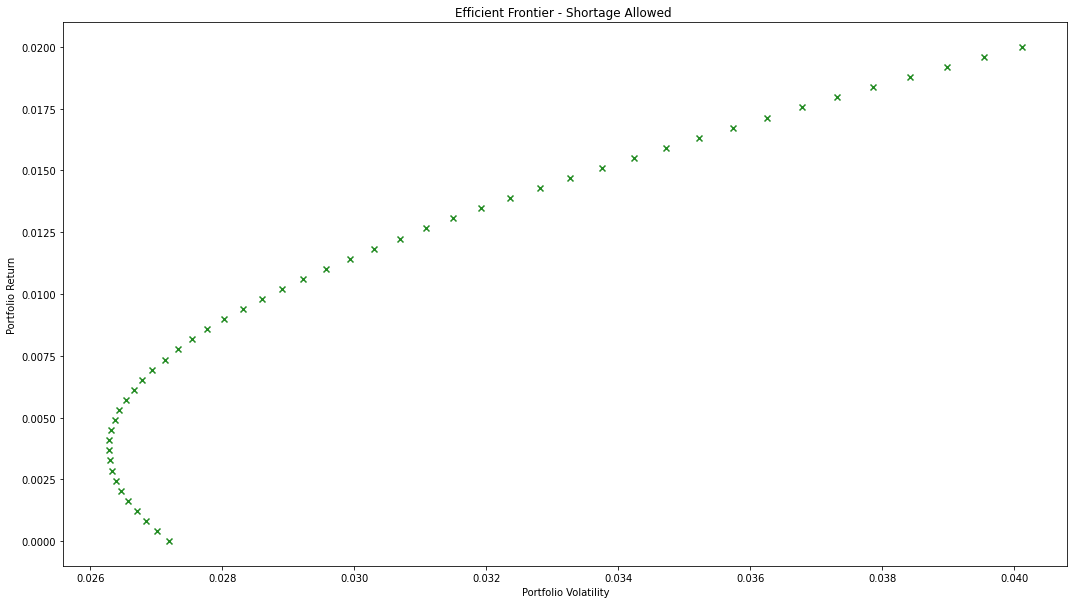

In [45]:
num_assets = len(returns.columns)
target_returns = np.linspace(0,0.02, 50)

portfolio_list_min_var=pd.DataFrame()
for target_return in target_returns:
    constraints = ({'type':'eq','fun': lambda weights: portfolio_parameters(weights, returns)['return']-target_return},
                   {'type':'eq','fun': lambda weights: np.sum(weights)-1})
    #bounds = tuple((0,1) for x in range(num_assets))
    initializer = num_assets * [1./num_assets,]

    optimal_variance=optimize.minimize(fun=minimize_volatility,
                                     x0=initializer,
                                     method = 'SLSQP',
                                     #bounds = bounds,
                                     constraints = constraints)

    weights_ = optimal_variance['x'].round(4)  
    weights_df = pd.DataFrame(weights_, index=returns.columns).T.rename({0:target_return},axis=0)
    portfolio_parameters_df = pd.DataFrame.from_dict(portfolio_parameters(weights_, returns), orient='index').T.rename({0:target_return},axis=0)
    portfolio_summary = pd.concat([weights_df,portfolio_parameters_df], axis=1)
    portfolio_list_min_var = portfolio_list_min_var.append(portfolio_summary)

    
plt.figure(figsize=(18,10))

plt.scatter(portfolio_list_min_var["std"],
            portfolio_list_min_var["return"],
            c='forestgreen',
            marker = 'x')
plt.title('Efficient Frontier - Shortage Allowed ')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')

Text(0, 0.5, 'Portfolio Return')

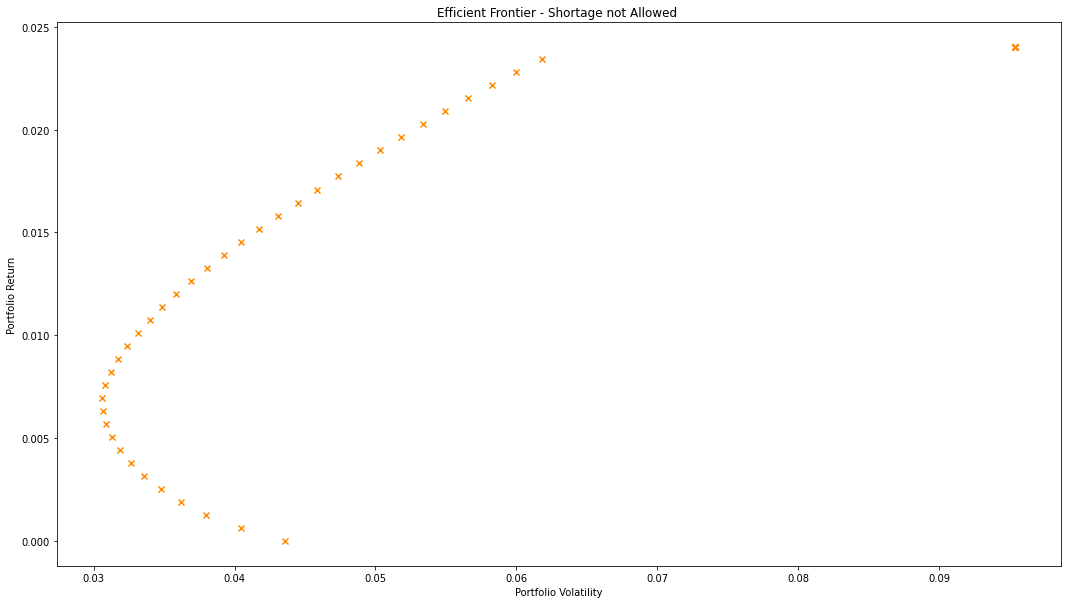

In [46]:
num_assets = len(returns.columns)
target_returns = np.linspace(0,0.05, 80)

portfolio_list_min_var=pd.DataFrame()
for target_return in target_returns:
    constraints = ({'type':'eq','fun': lambda weights: portfolio_parameters(weights, returns)['return']-target_return},
                   {'type':'eq','fun': lambda weights: np.sum(weights)-1})
    bounds = tuple((0,1) for weights in range(num_assets))
    initializer = num_assets * [1./num_assets,]

    optimal_variance=optimize.minimize(fun=minimize_volatility,
                                     x0=initializer,
                                     method = 'SLSQP',
                                     bounds = bounds,
                                     constraints = constraints)

    weights_ = optimal_variance['x'].round(4)  
    weights_df = pd.DataFrame(weights_, index=returns.columns).T.rename({0:target_return},axis=0)
    portfolio_parameters_df = pd.DataFrame.from_dict(portfolio_parameters(weights_, returns), orient='index').T.rename({0:target_return},axis=0)
    portfolio_summary = pd.concat([weights_df,portfolio_parameters_df], axis=1)
    portfolio_list_min_var = portfolio_list_min_var.append(portfolio_summary)

plt.figure(figsize=(18,10))

plt.scatter(portfolio_list_min_var["std"],
            portfolio_list_min_var["return"],
            c='darkorange',
            marker = 'x')
plt.title('Efficient Frontier - Shortage not Allowed ')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')

In [47]:
portfolio_list_min_var.sort_values("return", ascending=False).iloc[0]["return"]

0.02401923076923076

**Q3 .Add a risk-free rate using the current Central Bank rates for loans and apply the one fund
theorem.**

###### Method 1

In [48]:
risk_free_rate=interest_rates.mean()
risk_free_rate

rate    0.002234
dtype: float64

In [49]:
inverse_cov = pd.DataFrame(np.linalg.inv(returns.cov()),columns=returns.columns, index=returns.columns)
inverse_cov

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
AEFES,939.667385,-98.686102,16.644785,-15.597500,51.397687,-224.374621,-41.915391,-61.648313,-5.585027,-113.535001,-208.819221,-80.117724,37.665491,-260.468650,51.411961
AKBNK,-98.686102,886.012772,57.584558,116.191643,44.538934,-11.522197,-125.423685,-29.075746,19.561932,125.350412,-334.715179,-528.181384,-39.389781,-190.902425,119.743522
DEVA,16.644785,57.584558,378.978044,-93.760356,-284.066735,-253.177243,154.724310,9.511472,139.088316,46.480865,-47.934128,-6.190655,-34.945804,-133.136710,23.847038
DGKLB,-15.597500,116.191643,-93.760356,330.830733,69.820768,-48.248488,-338.707888,-36.841013,-80.850072,45.031616,-80.952150,-143.407939,-68.401064,96.323419,-3.185464
ECILC,51.397687,44.538934,-284.066735,69.820768,376.658362,273.147818,-116.225101,-36.687219,-144.550500,18.856694,-18.957859,-150.623461,20.833533,57.965486,10.938953
ENJSA,-224.374621,-11.522197,-253.177243,-48.248488,273.147818,1243.632427,13.232000,-144.265354,-38.409870,3.922260,147.001414,-167.885869,-47.566279,79.726569,-139.805274
ENKAI,-41.915391,-125.423685,154.724310,-338.707888,-116.225101,13.232000,1164.794373,49.744579,77.446493,-246.249518,180.222197,224.338233,-29.900149,-70.289934,-149.924136
GOLTS,-61.648313,-29.075746,9.511472,-36.841013,-36.687219,-144.265354,49.744579,308.940383,-19.199800,-38.057771,-26.541830,97.052015,-62.600802,-35.871184,-41.364554
IHLGM,-5.585027,19.561932,139.088316,-80.850072,-144.550500,-38.409870,77.446493,-19.199800,284.858129,21.822266,-65.366872,21.825302,-58.965625,-150.066093,-25.331442
SISE,-113.535001,125.350412,46.480865,45.031616,18.856694,3.922260,-246.249518,-38.057771,21.822266,693.806519,-148.741315,-257.737523,-46.642635,-86.792385,84.725747


In [50]:
right_handside = pd.DataFrame([i-risk_free_rate for i in returns.mean()])
v_values = pd.DataFrame(np.dot(inverse_cov,right_handside['rate']),index=inverse_cov.columns)
v_values.columns=['v_val']
v_values['weights']=v_values['v_val']/v_values['v_val'].sum()
v_values

,v_val,weights
AEFES,-0.761085,-0.347757
AKBNK,-0.487945,-0.222953
DEVA,3.168676,1.447840
DGKLB,-1.569893,-0.717320
ECILC,-0.450080,-0.205652
ENJSA,-0.036015,-0.016456
ENKAI,-1.279705,-0.584726
GOLTS,0.952483,0.435211
IHLGM,1.252197,0.572157
SISE,4.651464,2.125359


In [51]:
one_fund_mean_1 = np.sum(returns.mean()*v_values['weights'])
one_fund_var_1 = np.dot(v_values['weights'].T, (np.dot(returns.cov(),v_values['weights'])))
print('mean and variance according to one fund with method 1:',round(one_fund_mean_1,4),'&',round(one_fund_var_1,4))

mean and variance according to one fund with method 1: 0.1352 & 0.0608


##### Method 2

In [52]:
def portfolio_parameters_net(weights, returns):
    weights = np.array(weights)
    port_return = np.sum(right_handside['rate'] * weights)
    port_var = np.dot(weights.T, np.dot(returns.cov(), weights))

    return {'return': port_return, 'variance': port_var, 'std': np.sqrt(port_var)}

# Objective Function
def minimize_volatility(weights):  
    return -portfolio_parameters_net(weights, returns)['return']/portfolio_parameters_net(weights, returns)['std']

In [53]:
num_assets = len(returns.columns)
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1})

initializer = num_assets * [1./num_assets,]

optimal_variance=optimize.minimize(fun=minimize_volatility,
                                 x0=initializer,
                                 method = 'SLSQP',
                                 #bounds = bounds,
                                 constraints = constraints)

print(optimal_variance)

weights_ = optimal_variance['x'].round(4)
portfolio_parameters_net(weights_, returns)

     fun: -0.539513737206418
     jac: array([ 4.70951200e-05, -1.04300678e-04,  2.54385173e-04, -6.10947609e-06,
        2.97233462e-04, -9.37655568e-05,  1.04025006e-04, -2.61217356e-05,
        4.82723117e-05,  1.31577253e-05, -2.43633986e-06, -1.20133162e-04,
       -1.51924789e-04, -7.58469105e-05, -1.06282532e-04])
 message: 'Optimization terminated successfully.'
    nfev: 816
     nit: 48
    njev: 48
  status: 0
 success: True
       x: array([-0.33293677, -0.22194922,  1.44418317, -0.71512018, -0.20373056,
       -0.02406057, -0.56517469,  0.43252319,  0.57187809,  2.11113507,
       -2.24553968, -0.37824296,  2.75896322, -3.66054025,  2.02861214])


{'return': 0.1319712104214963,
 'variance': 0.059834736924274455,
 'std': 0.24461139982485375}

In [54]:
question_3=pd.DataFrame()
question_3['method_1']=v_values['weights']
question_3['method_2']=optimal_variance['x']
question_3

,method_1,method_2
AEFES,-0.347757,-0.332937
AKBNK,-0.222953,-0.221949
DEVA,1.447840,1.444183
DGKLB,-0.717320,-0.715120
ECILC,-0.205652,-0.203731
ENJSA,-0.016456,-0.024061
ENKAI,-0.584726,-0.565175
GOLTS,0.435211,0.432523
IHLGM,0.572157,0.571878
SISE,2.125359,2.111135


In [55]:
one_fund_mean_method_2 = np.sum(returns.mean()*question_3['method_2'])
one_fund_var_method_2 = np.dot(question_3['method_2'].T, (np.dot(returns.cov(),question_3['method_2'])))
print('mean and variance according to one fund with method_2:',round(one_fund_mean_method_2,4),'&',round(one_fund_var_method_2,4))

mean and variance according to one fund with method_2: 0.1342 & 0.0598


**Q4.Assuming the weekly return of a portfolio is normally distributed with the
average and standard deviation you have calculated for the optimal weights
calculate the probability of gaining return above the inflation (risk free return)
rate. Compare the result with the previous portion of the assignment. Comment.**

In [56]:
one_fund=pd.DataFrame()
one_fund["z-value"] = (risk_free_rate - one_fund_mean_1) / np.sqrt(one_fund_var_1)
one_fund["p-value"] = one_fund["z-value"].apply(lambda z: stats.norm.sf(abs(z)))
one_fund["probability"] = 1- one_fund["p-value"] 
one_fund

,z-value,p-value,probability
rate,-0.539518,0.294765,0.705235


---

# Phase 3

## 1) Assume your portfolio is the market portfolio; draw the capital market line and the security market line. Calculate the price of risk. 

In [57]:
market_portfolio = portfolio_list_min_var.sort_values("return", ascending=False).reset_index()
market_portfolio = market_portfolio.loc[50]
market_portfolio

index       0.018354
AEFES       0.000000
AKBNK       0.000000
DEVA        0.205300
DGKLB       0.000000
ECILC       0.016300
ENJSA       0.101400
ENKAI       0.070000
GOLTS       0.000000
IHLGM       0.000000
SISE        0.149200
THYAO       0.000000
TTKOM       0.000000
TTRAK       0.457900
ULKER       0.000000
VESTL       0.000000
return      0.018356
variance    0.002382
std         0.048806
sharpe      0.376090
Name: 50, dtype: float64

In [58]:
market_return = market_portfolio["return"]
market_std = market_portfolio["std"]
risk_free_rate_of_return = interest_rates.mean()[0]
risk_free_rate_of_return

0.0022342465753424656

In [59]:
market_return,market_std, risk_free_rate_of_return, 

(0.01835551346153846, 0.04880620187300223, 0.0022342465753424656)

In [60]:
price_of_risk = (market_return - risk_free_rate_of_return)/market_std
price_of_risk

0.330311851107465

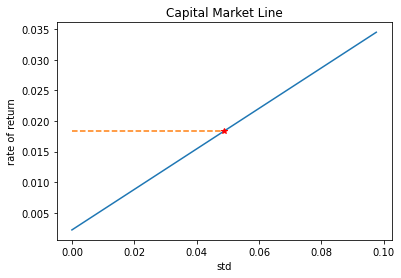

In [61]:
plt.plot([0, market_std, market_std*2 ], [risk_free_rate_of_return, market_return, (2*market_return-risk_free_rate_of_return) ])
plt.plot([0,market_std], [market_return,market_return], "--")
plt.plot([market_std],[market_return], "r*")
plt.title("Capital Market Line")
plt.xlabel("std")
plt.ylabel("rate of return")
plt.show()

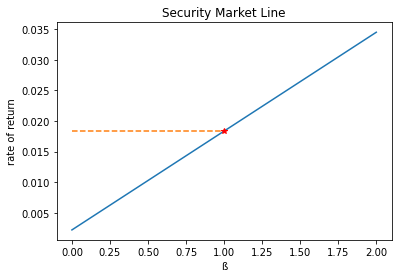

In [62]:
plt.plot([0,1, 2],[risk_free_rate_of_return, market_return, (2*market_return-risk_free_rate_of_return)])
plt.plot([0,1], [market_return,market_return], "--")
plt.plot([1],[market_return], "r*")
plt.title("Security Market Line")
plt.xlabel("ß")
plt.ylabel("rate of return")
plt.show()

## 2) Apply the CAPM model to your portfolio, find the beta values for your assets in your portfolio, and find the capital market line and the security market line. Comment on them.

* https://www.investing.com/indices/ise-100
* 1-Year Change: 25.87%

In [63]:
market_return = bist_100_returns.mean()
print(f"market_return: {market_return}")

market_return: 0.004942307692307694


In [64]:
asset_returns = returns.agg(("mean", "std"))
asset_returns = asset_returns.T
asset_returns

,mean,std
AEFES,0.001135,0.054754
AKBNK,-0.002769,0.062592
DEVA,0.024019,0.095417
DGKLB,0.012962,0.093894
ECILC,0.016327,0.095148
ENJSA,0.008019,0.042478
ENKAI,0.004135,0.040907
GOLTS,0.015673,0.079709
IHLGM,0.011673,0.091940
SISE,0.008385,0.051576


In [65]:
returns

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015
5,0.016,-0.007,0.151,0.181,0.055,0.031,0.025,0.008,0.026,-0.037,-0.033,0.006,-0.011,0.012,-0.012
6,-0.047,-0.057,0.060,0.014,-0.002,0.019,0.055,0.001,-0.026,0.073,-0.059,-0.037,0.031,-0.066,-0.020
7,0.037,0.021,0.014,0.085,-0.005,0.028,-0.033,-0.006,0.079,-0.005,0.058,0.013,0.037,0.025,0.134
8,-0.043,-0.039,-0.008,-0.017,0.036,0.024,-0.015,-0.053,0.122,-0.011,0.029,0.051,-0.041,-0.019,0.072
9,-0.010,-0.051,-0.050,-0.053,-0.049,-0.035,-0.013,-0.075,-0.109,-0.051,-0.025,0.050,0.023,-0.045,-0.030


In [66]:
cov_with_market = pd.concat([cov_data, bist_100_returns], axis=1).cov()["market_return"].rename("cov")
cov_with_market

AEFES            0.000076
AKBNK            0.000195
DEVA            -0.000552
DGKLB            0.000246
ECILC           -0.000007
ENJSA           -0.000379
ENKAI           -0.000215
GOLTS           -0.000318
IHLGM            0.000179
SISE             0.000079
THYAO            0.000072
TTKOM            0.000246
TTRAK           -0.000149
ULKER            0.000075
VESTL            0.000058
market_return    0.001630
Name: cov, dtype: float64

In [67]:
ß = cov_with_market / cov_with_market.market_return

In [68]:
ß

AEFES            0.046673
AKBNK            0.119368
DEVA            -0.338900
DGKLB            0.150686
ECILC           -0.004343
ENJSA           -0.232377
ENKAI           -0.132083
GOLTS           -0.195058
IHLGM            0.110072
SISE             0.048330
THYAO            0.044242
TTKOM            0.151232
TTRAK           -0.091378
ULKER            0.046031
VESTL            0.035339
market_return    1.000000
Name: cov, dtype: float64

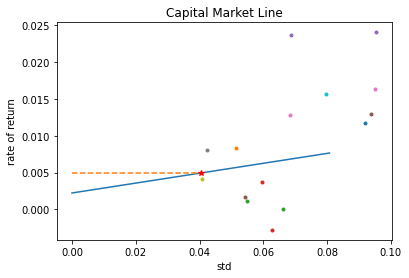

In [69]:
plt.plot([0, bist_100_returns.std(), bist_100_returns.std()*2 ], [risk_free_rate_of_return, market_return, (2*market_return-risk_free_rate_of_return) ])
plt.plot([0,bist_100_returns.std()], [market_return,market_return], "--")
plt.plot([bist_100_returns.std()],[market_return], "r*")
plt.plot([asset_returns["std"]],[asset_returns["mean"]], ".")
plt.title("Capital Market Line")
plt.xlabel("std")
plt.ylabel("rate of return")
plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  after removing the cwd from sys.path.


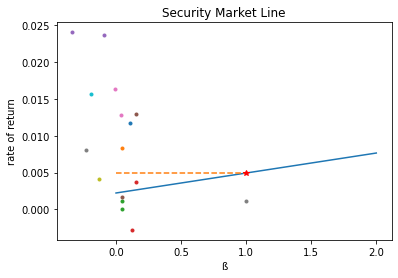

In [70]:
plt.plot([0,1, 2],[risk_free_rate_of_return, market_return, (2*market_return-risk_free_rate_of_return)])
plt.plot([0,1], [market_return,market_return], "--")
plt.plot([1],[market_return], "r*")
plt.plot([ß],[asset_returns["mean"]], ".")
plt.title("Security Market Line")
plt.xlabel("ß")
plt.ylabel("rate of return")
plt.show()

### 3) Abandon the assumption and evaluate the performance of your portfolio using the market index of your choice. Calculate the Sharpe and Jensen index values for your portfolio and the individual assets in your portfolio. Calculate their beta values. 

In [71]:
portfolio_return = market_portfolio["return"]
portfolio_std = market_portfolio["std"]
risk_free_rate_of_return = interest_rates.mean()[0]
risk_free_rate_of_return

0.0022342465753424656

In [72]:
ß = ß[0:15]

In [73]:
ß = ß.rename("ß")
ß

AEFES    0.046673
AKBNK    0.119368
DEVA    -0.338900
DGKLB    0.150686
ECILC   -0.004343
ENJSA   -0.232377
ENKAI   -0.132083
GOLTS   -0.195058
IHLGM    0.110072
SISE     0.048330
THYAO    0.044242
TTKOM    0.151232
TTRAK   -0.091378
ULKER    0.046031
VESTL    0.035339
Name: ß, dtype: float64

In [74]:
portfolio_weights = market_portfolio[1:16]
portfolio_weights

AEFES    0.0000
AKBNK    0.0000
DEVA     0.2053
DGKLB    0.0000
ECILC    0.0163
ENJSA    0.1014
ENKAI    0.0700
GOLTS    0.0000
IHLGM    0.0000
SISE     0.1492
THYAO    0.0000
TTKOM    0.0000
TTRAK    0.4579
ULKER    0.0000
VESTL    0.0000
Name: 50, dtype: float64

In [75]:
ß_portfolio = np.sum(ß * portfolio_weights)

In [76]:
ß_portfolio

-0.13708679226380946

#### Portfolio Jensen Index & Sharpe Ratio

In [77]:
jensen_portfolio =  (portfolio_return - risk_free_rate_of_return) - ß_portfolio*(market_return - risk_free_rate_of_return)

In [78]:
jensen_portfolio

0.016492506297975107

In [79]:
sharpe_portfolio = (portfolio_return - risk_free_rate_of_return) / portfolio_std

In [80]:
sharpe_portfolio

0.330311851107465

#### Individual Jensen Index & Sharpe Ratio

In [81]:
asset_parameters = data_agg[["mean", "std"]]

In [82]:
asset_parameters = pd.concat([asset_parameters,ß], axis=1)

In [83]:
asset_parameters

,mean,std,ß
Şirket,,,
AEFES,0.001135,0.054754,0.046673
AKBNK,-0.002769,0.062592,0.119368
DEVA,0.024019,0.095417,-0.338900
DGKLB,0.012962,0.093894,0.150686
ECILC,0.016327,0.095148,-0.004343
ENJSA,0.008019,0.042478,-0.232377
ENKAI,0.004135,0.040907,-0.132083
GOLTS,0.015673,0.079709,-0.195058
IHLGM,0.011673,0.091940,0.110072


In [84]:
asset_parameters["Jensen"] = (asset_parameters["mean"] - risk_free_rate_of_return) - asset_parameters["ß"]*(market_return - risk_free_rate_of_return)

In [85]:
asset_parameters["Sharpe"] = (asset_parameters["mean"] - risk_free_rate_of_return) / asset_parameters["std"]

In [86]:
asset_parameters

,mean,std,ß,Jensen,Sharpe
Şirket,,,,,
AEFES,0.001135,0.054754,0.046673,-0.001226,-0.020083
AKBNK,-0.002769,0.062592,0.119368,-0.005327,-0.079938
DEVA,0.024019,0.095417,-0.338900,0.022703,0.228313
DGKLB,0.012962,0.093894,0.150686,0.010319,0.114248
ECILC,0.016327,0.095148,-0.004343,0.014104,0.148113
ENJSA,0.008019,0.042478,-0.232377,0.006414,0.136188
ENKAI,0.004135,0.040907,-0.132083,0.002258,0.046455
GOLTS,0.015673,0.079709,-0.195058,0.013967,0.168599
IHLGM,0.011673,0.091940,0.110072,0.009141,0.102663


# Final

## 1) Generate a one factor and a two factor model. Explain the reason behind using the selected factors and discuss the effectiveness of your factor models.


#### One factor with bist 100 returns

In [87]:
returns = cov_data

In [88]:
returns.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015


In [89]:
one_factor_data = pd.concat([returns, bist_100_returns], axis=1)

In [90]:
one_factor_data.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL,market_return
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043,0.030
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021,0.002
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015,0.004
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066,0.025
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015,0.083


In [91]:
one_factor_avg = one_factor_data.mean()
one_factor_avg

AEFES            0.001135
AKBNK           -0.002769
DEVA             0.024019
DGKLB            0.012962
ECILC            0.016327
ENJSA            0.008019
ENKAI            0.004135
GOLTS            0.015673
IHLGM            0.011673
SISE             0.008385
THYAO            0.000115
TTKOM            0.003731
TTRAK            0.023596
ULKER            0.001673
VESTL            0.012788
market_return    0.004942
dtype: float64

In [92]:
one_factor_var = one_factor_data.var()
one_factor_var

AEFES            0.002998
AKBNK            0.003918
DEVA             0.009104
DGKLB            0.008816
ECILC            0.009053
ENJSA            0.001804
ENKAI            0.001673
GOLTS            0.006353
IHLGM            0.008453
SISE             0.002660
THYAO            0.004382
TTKOM            0.003567
TTRAK            0.004733
ULKER            0.002933
VESTL            0.004671
market_return    0.001630
dtype: float64

In [93]:
 one_factor_cov_with_market = pd.concat([returns, bist_100_returns], axis=1).cov()["market_return"].rename("cov")
one_factor_cov_with_market

AEFES            0.000076
AKBNK            0.000195
DEVA            -0.000552
DGKLB            0.000246
ECILC           -0.000007
ENJSA           -0.000379
ENKAI           -0.000215
GOLTS           -0.000318
IHLGM            0.000179
SISE             0.000079
THYAO            0.000072
TTKOM            0.000246
TTRAK           -0.000149
ULKER            0.000075
VESTL            0.000058
market_return    0.001630
Name: cov, dtype: float64

In [94]:
one_factor_b = one_factor_cov_with_market / one_factor_cov_with_market["market_return"]
one_factor_b

AEFES            0.046673
AKBNK            0.119368
DEVA            -0.338900
DGKLB            0.150686
ECILC           -0.004343
ENJSA           -0.232377
ENKAI           -0.132083
GOLTS           -0.195058
IHLGM            0.110072
SISE             0.048330
THYAO            0.044242
TTKOM            0.151232
TTRAK           -0.091378
ULKER            0.046031
VESTL            0.035339
market_return    1.000000
Name: cov, dtype: float64

In [95]:
one_factor_a = one_factor_avg - one_factor_b * one_factor_avg["market_return"]
one_factor_a

AEFES            0.000904
AKBNK           -0.003359
DEVA             0.025694
DGKLB            0.012217
ECILC            0.016348
ENJSA            0.009168
ENKAI            0.004787
GOLTS            0.016637
IHLGM            0.011129
SISE             0.008146
THYAO           -0.000103
TTKOM            0.002983
TTRAK            0.024048
ULKER            0.001446
VESTL            0.012614
market_return    0.000000
dtype: float64

In [96]:
returns["AEFES"].name

'AEFES'

In [97]:
def calculate_error(column):
      return column - (one_factor_data["market_return"] * one_factor_b[column.name] + one_factor_a[column.name])
    
one_factor_error = returns.apply(calculate_error, axis=0)
one_factor_error

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.010696,0.013778,-0.046527,-0.004737,-0.019218,0.000804,0.016175,-0.046785,0.100569,0.036404,-0.005224,-0.011520,-0.030306,0.006173,0.029326
1,0.045003,0.014120,0.046984,-0.087518,-0.019340,-0.026703,-0.119523,0.021753,0.112651,0.002758,0.014015,0.025714,0.055135,0.057462,-0.033684
2,-0.012091,-0.031118,-0.042339,0.037180,-0.019331,-0.040238,0.016741,-0.048857,0.016431,-0.012339,0.021926,-0.015588,-0.029682,-0.025630,0.002245
3,0.020929,0.094375,-0.012222,-0.021984,0.051760,0.073642,0.001515,0.001239,-0.013881,-0.001354,0.008997,0.071236,0.065237,0.099404,0.052503
4,0.078222,0.008452,0.045434,0.035276,-0.002988,-0.008880,0.020175,0.056553,-0.002265,0.000843,0.040431,0.004464,-0.013463,-0.015266,-0.000547
5,0.011736,-0.012235,0.149707,0.157934,0.038964,0.038563,0.029723,0.005407,0.006946,-0.048626,-0.036082,-0.007872,-0.028469,0.007240,-0.027158
6,-0.044824,-0.045763,0.011938,0.011729,-0.018635,-0.005505,0.041495,-0.028511,-0.029864,0.068044,-0.055977,-0.030002,0.000921,-0.064408,-0.030281
7,0.036189,0.024598,-0.012372,0.073085,-0.021357,0.018368,-0.038052,-0.023027,0.068091,-0.013049,0.058192,0.010319,0.012769,0.023646,0.121457
8,-0.044977,-0.038386,-0.025899,-0.032683,0.019752,0.020177,-0.016749,-0.065151,0.108339,-0.020257,0.028086,0.044538,-0.062946,-0.021504,0.058573
9,-0.011744,-0.049789,-0.069594,-0.067929,-0.065270,-0.039985,-0.015410,-0.088126,-0.122110,-0.060016,-0.025693,0.044294,0.000597,-0.047274,-0.043250


In [98]:
one_factor_error_mean = one_factor_error.mean().round(10)
one_factor_error_mean

AEFES   -0.0
AKBNK    0.0
DEVA     0.0
DGKLB    0.0
ECILC   -0.0
ENJSA    0.0
ENKAI   -0.0
GOLTS   -0.0
IHLGM   -0.0
SISE     0.0
THYAO   -0.0
TTKOM   -0.0
TTRAK   -0.0
ULKER    0.0
VESTL   -0.0
dtype: float64

In [99]:
one_factor_error_var = one_factor_error.var()
one_factor_error_var

AEFES    0.002994
AKBNK    0.003894
DEVA     0.008917
DGKLB    0.008779
ECILC    0.009053
ENJSA    0.001716
ENKAI    0.001645
GOLTS    0.006291
IHLGM    0.008433
SISE     0.002656
THYAO    0.004379
TTKOM    0.003530
TTRAK    0.004719
ULKER    0.002930
VESTL    0.004669
dtype: float64

In [100]:
one_factor_error_var / one_factor_var

AEFES            0.998816
AKBNK            0.994073
DEVA             0.979440
DGKLB            0.995802
ECILC            0.999997
ENJSA            0.951226
ENKAI            0.983009
GOLTS            0.990240
IHLGM            0.997664
SISE             0.998569
THYAO            0.999272
TTKOM            0.989550
TTRAK            0.997125
ULKER            0.998823
VESTL            0.999564
market_return         NaN
dtype: float64

Error variances are as high as variance of stock returns. Thus,  the factor does not explain much of the variations in the return. Hence there is high non-systemic risk. Model is not adequate.

---

### one factor with CDS

In [101]:
returns = cov_data

In [102]:
returns.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015


In [103]:
one_factor_data = pd.concat([returns, cds.reset_index(drop=True)], axis=1)

In [104]:
one_factor_data.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL,cds_change
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043,-0.071
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021,-0.007
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015,-0.035
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066,0.015
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015,-0.096


In [105]:
one_factor_avg = one_factor_data.mean()
one_factor_avg

AEFES         0.001135
AKBNK        -0.002769
DEVA          0.024019
DGKLB         0.012962
ECILC         0.016327
ENJSA         0.008019
ENKAI         0.004135
GOLTS         0.015673
IHLGM         0.011673
SISE          0.008385
THYAO         0.000115
TTKOM         0.003731
TTRAK         0.023596
ULKER         0.001673
VESTL         0.012788
cds_change    0.013288
dtype: float64

In [106]:
one_factor_var = one_factor_data.var()
one_factor_var

AEFES         0.002998
AKBNK         0.003918
DEVA          0.009104
DGKLB         0.008816
ECILC         0.009053
ENJSA         0.001804
ENKAI         0.001673
GOLTS         0.006353
IHLGM         0.008453
SISE          0.002660
THYAO         0.004382
TTKOM         0.003567
TTRAK         0.004733
ULKER         0.002933
VESTL         0.004671
cds_change    0.021874
dtype: float64

In [107]:
one_factor_cov_with_market = one_factor_data.cov()["cds_change"].rename("cov")
one_factor_cov_with_market

AEFES        -0.003880
AKBNK        -0.005436
DEVA         -0.004521
DGKLB        -0.005328
ECILC        -0.005044
ENJSA        -0.001283
ENKAI        -0.001664
GOLTS        -0.004777
IHLGM        -0.004955
SISE         -0.002451
THYAO        -0.004996
TTKOM        -0.005329
TTRAK        -0.003154
ULKER        -0.001684
VESTL        -0.004945
cds_change    0.021874
Name: cov, dtype: float64

In [108]:
one_factor_b = one_factor_cov_with_market / one_factor_cov_with_market["cds_change"]
one_factor_b

AEFES        -0.177381
AKBNK        -0.248521
DEVA         -0.206660
DGKLB        -0.243553
ECILC        -0.230609
ENJSA        -0.058658
ENKAI        -0.076057
GOLTS        -0.218376
IHLGM        -0.226508
SISE         -0.112026
THYAO        -0.228417
TTKOM        -0.243601
TTRAK        -0.144187
ULKER        -0.076977
VESTL        -0.226078
cds_change    1.000000
Name: cov, dtype: float64

In [109]:
one_factor_a = one_factor_avg - one_factor_b * one_factor_avg["cds_change"]
one_factor_a

AEFES         0.003492
AKBNK         0.000533
DEVA          0.026765
DGKLB         0.016198
ECILC         0.019391
ENJSA         0.008799
ENKAI         0.005145
GOLTS         0.018575
IHLGM         0.014683
SISE          0.009873
THYAO         0.003151
TTKOM         0.006968
TTRAK         0.025512
ULKER         0.002696
VESTL         0.015793
cds_change    0.000000
dtype: float64

In [110]:
returns["AEFES"].name

'AEFES'

In [111]:
def calculate_error(column):
      return column - (one_factor_data["cds_change"] * one_factor_b[column.name] + one_factor_a[column.name])
    
one_factor_error = returns.apply(calculate_error, axis=0)
one_factor_error

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,-0.003086,-0.004178,-0.072438,-0.021490,-0.038765,-0.009963,0.006455,-0.070080,0.084235,0.028173,-0.023368,-0.028264,-0.044749,0.000839,0.011156
1,0.041267,0.008727,0.043788,-0.092903,-0.024006,-0.027209,-0.120678,0.017896,0.107731,0.000343,0.009250,0.020327,0.052479,0.055765,-0.038375
2,-0.020700,-0.043231,-0.051999,0.025278,-0.030463,-0.042852,0.013193,-0.059218,0.005389,-0.017794,0.010855,-0.027494,-0.036559,-0.029390,-0.008705
3,0.022169,0.097195,-0.018666,-0.018545,0.052068,0.069081,-0.001004,-0.002299,-0.011285,-0.000193,0.010276,0.074686,0.063651,0.100459,0.053598
4,0.062480,-0.009391,-0.003605,0.020421,-0.028530,-0.033430,0.001553,0.017461,-0.018428,-0.007628,0.018921,-0.010354,-0.036354,-0.020086,-0.022496
5,0.006300,-0.016231,0.117001,0.156278,0.027537,0.020148,0.017193,-0.018218,0.003389,-0.050794,-0.044145,-0.009494,-0.041559,0.006610,-0.035705
6,-0.052620,-0.060515,0.030755,-0.005121,-0.024159,0.009497,0.048942,-0.020195,-0.043401,0.061782,-0.064892,-0.046891,0.003758,-0.069620,-0.038506
7,0.035814,0.023698,-0.010079,0.071968,-0.021393,0.019964,-0.037157,-0.021736,0.067262,-0.013417,0.057819,0.009199,0.013362,0.023305,0.121146
8,-0.026802,-0.011947,-0.011826,-0.006164,0.042206,0.021712,-0.011703,-0.047335,0.132459,-0.008438,0.051204,0.071072,-0.050507,-0.013152,0.081302
9,0.000167,-0.032397,-0.060853,-0.050444,-0.050634,-0.039282,-0.012289,-0.076760,-0.106242,-0.052247,-0.010563,0.061789,0.008590,-0.041769,-0.028385


In [112]:
one_factor_error_mean = one_factor_error.mean().round(10)
one_factor_error_mean

AEFES    0.0
AKBNK    0.0
DEVA     0.0
DGKLB    0.0
ECILC   -0.0
ENJSA   -0.0
ENKAI   -0.0
GOLTS    0.0
IHLGM   -0.0
SISE     0.0
THYAO    0.0
TTKOM    0.0
TTRAK   -0.0
ULKER    0.0
VESTL   -0.0
dtype: float64

In [113]:
one_factor_error_var = one_factor_error.var()
one_factor_error_var

AEFES    0.002310
AKBNK    0.002567
DEVA     0.008170
DGKLB    0.007519
ECILC    0.007890
ENJSA    0.001729
ENKAI    0.001547
GOLTS    0.005310
IHLGM    0.007331
SISE     0.002386
THYAO    0.003240
TTKOM    0.002269
TTRAK    0.004278
ULKER    0.002804
VESTL    0.003553
dtype: float64

In [114]:
one_factor_error_var / one_factor_var

AEFES         0.770430
AKBNK         0.655149
DEVA          0.897388
DGKLB         0.852821
ECILC         0.871504
ENJSA         0.958288
ENKAI         0.924384
GOLTS         0.835815
IHLGM         0.867231
SISE          0.896802
THYAO         0.739538
TTKOM         0.636069
TTRAK         0.903908
ULKER         0.955812
VESTL         0.760640
cds_change         NaN
dtype: float64

Error variances are as high as variance of stock returns. Thus,  the factor does not explain much of the variations in the return. Hence there is high non-systemic risk. Model is not adequate.

---

### Two factor with money supply & bist 100 returns 

In [115]:
money_supply_data = {"money_supply":[
                     2356.09,
                     2457.54, 
                     2479.87, 
                     2551.44, 
                     2666.78,
                     2912.2,
                     2917.94,
                     3012.66,
                     3143.66,
                     3202.29,
                     3274.81,
                     3382.01,
                     3354.28,
                     3374.87]}

In [116]:
money_supply = pd.DataFrame(data=money_supply_data, 
             index=pd.date_range(start="2019-11-01", end="2020-12-01", freq="MS"))
money_supply.head()

,money_supply
2019-11-01,2356.09
2019-12-01,2457.54
2020-01-01,2479.87
2020-02-01,2551.44
2020-03-01,2666.78


In [117]:
money_supply = money_supply.pct_change()
money_supply

,money_supply
2019-11-01,NaN
2019-12-01,0.043059
2020-01-01,0.009086
2020-02-01,0.028860
2020-03-01,0.045206
2020-04-01,0.092029
2020-05-01,0.001971
2020-06-01,0.032461
2020-07-01,0.043483
2020-08-01,0.018650


In [118]:
money_supply.resample("W").mean().fillna( method ='ffill')[6:]

,money_supply
2019-12-15,0.043059
2019-12-22,0.043059
2019-12-29,0.043059
2020-01-05,0.009086
2020-01-12,0.009086
2020-01-19,0.009086
2020-01-26,0.009086
2020-02-02,0.028860
2020-02-09,0.028860
2020-02-16,0.028860


In [119]:
money_supply = money_supply.resample("W").mean().fillna( method ='ffill')[6:]

In [120]:
money_supply

,money_supply
2019-12-15,0.043059
2019-12-22,0.043059
2019-12-29,0.043059
2020-01-05,0.009086
2020-01-12,0.009086
2020-01-19,0.009086
2020-01-26,0.009086
2020-02-02,0.028860
2020-02-09,0.028860
2020-02-16,0.028860


In [121]:
returns = cov_data

In [122]:
returns.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015


In [123]:
two_factor_data = pd.concat([returns, bist_100_returns, money_supply.reset_index(drop=True)], axis=1)
two_factor_data

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL,market_return,money_supply
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043,0.030,0.043059
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021,0.002,0.043059
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015,0.004,0.043059
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066,0.025,0.009086
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015,0.083,0.009086
5,0.016,-0.007,0.151,0.181,0.055,0.031,0.025,0.008,0.026,-0.037,-0.033,0.006,-0.011,0.012,-0.012,0.072,0.009086
6,-0.047,-0.057,0.060,0.014,-0.002,0.019,0.055,0.001,-0.026,0.073,-0.059,-0.037,0.031,-0.066,-0.020,-0.066,0.009086
7,0.037,0.021,0.014,0.085,-0.005,0.028,-0.033,-0.006,0.079,-0.005,0.058,0.013,0.037,0.025,0.134,-0.002,0.028860
8,-0.043,-0.039,-0.008,-0.017,0.036,0.024,-0.015,-0.053,0.122,-0.011,0.029,0.051,-0.041,-0.019,0.072,0.023,0.028860
9,-0.010,-0.051,-0.050,-0.053,-0.049,-0.035,-0.013,-0.075,-0.109,-0.051,-0.025,0.050,0.023,-0.045,-0.030,0.018,0.028860


In [124]:
two_factor_avg = two_factor_data.mean()
two_factor_avg

AEFES            0.001135
AKBNK           -0.002769
DEVA             0.024019
DGKLB            0.012962
ECILC            0.016327
ENJSA            0.008019
ENKAI            0.004135
GOLTS            0.015673
IHLGM            0.011673
SISE             0.008385
THYAO            0.000115
TTKOM            0.003731
TTRAK            0.023596
ULKER            0.001673
VESTL            0.012788
market_return    0.004942
money_supply     0.028243
dtype: float64

In [125]:
two_factor_var = two_factor_data.var()
two_factor_var

AEFES            0.002998
AKBNK            0.003918
DEVA             0.009104
DGKLB            0.008816
ECILC            0.009053
ENJSA            0.001804
ENKAI            0.001673
GOLTS            0.006353
IHLGM            0.008453
SISE             0.002660
THYAO            0.004382
TTKOM            0.003567
TTRAK            0.004733
ULKER            0.002933
VESTL            0.004671
market_return    0.001630
money_supply     0.000629
dtype: float64

In [126]:
two_factor_cov_with_factors = two_factor_data.cov()[["market_return", "money_supply"]]
two_factor_cov_with_factors

,market_return,money_supply
AEFES,0.000076,-0.000217
AKBNK,0.000195,-0.000227
DEVA,-0.000552,0.000508
DGKLB,0.000246,0.000079
ECILC,-0.000007,-0.000029
ENJSA,-0.000379,-0.000087
ENKAI,-0.000215,-0.000012
GOLTS,-0.000318,0.000011
IHLGM,0.000179,0.000023
SISE,0.000079,-0.000019


In [127]:
two_factor_b1 = two_factor_cov_with_factors["market_return"] / two_factor_cov_with_factors["market_return"]["market_return"]
two_factor_b1

AEFES            0.046673
AKBNK            0.119368
DEVA            -0.338900
DGKLB            0.150686
ECILC           -0.004343
ENJSA           -0.232377
ENKAI           -0.132083
GOLTS           -0.195058
IHLGM            0.110072
SISE             0.048330
THYAO            0.044242
TTKOM            0.151232
TTRAK           -0.091378
ULKER            0.046031
VESTL            0.035339
market_return    1.000000
money_supply    -0.114010
Name: market_return, dtype: float64

In [128]:
two_factor_b2 = two_factor_cov_with_factors["money_supply"] / two_factor_cov_with_factors["money_supply"]["money_supply"]
two_factor_b2

AEFES           -0.345583
AKBNK           -0.361514
DEVA             0.807200
DGKLB            0.125183
ECILC           -0.046522
ENJSA           -0.138135
ENKAI           -0.019315
GOLTS            0.018062
IHLGM            0.037211
SISE            -0.030685
THYAO           -0.320535
TTKOM           -0.180538
TTRAK            0.225677
ULKER            0.284058
VESTL            0.102417
market_return   -0.295331
money_supply     1.000000
Name: money_supply, dtype: float64

In [129]:
two_factor_a = (two_factor_avg 
                - two_factor_b1 * two_factor_avg["market_return"] 
                - two_factor_b2 * two_factor_avg["money_supply"])
two_factor_a

AEFES            0.010664
AKBNK            0.006851
DEVA             0.002896
DGKLB            0.008681
ECILC            0.017662
ENJSA            0.013069
ENKAI            0.005333
GOLTS            0.016127
IHLGM            0.010078
SISE             0.009012
THYAO            0.008950
TTKOM            0.008082
TTRAK            0.017674
ULKER           -0.006577
VESTL            0.009721
market_return    0.008341
money_supply     0.000563
dtype: float64

In [130]:
def calculate_error_two_factor(column):
      return (column 
              - (two_factor_data["market_return"] * two_factor_b1[column.name]
                 + two_factor_data["money_supply"] * two_factor_b2[column.name] 
                 + two_factor_a[column.name]))
    
two_factor_error = returns.apply(calculate_error_two_factor, axis=0)
two_factor_error

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.015816,0.019134,-0.058486,-0.006592,-0.018529,0.002850,0.016461,-0.047053,0.100017,0.036859,-0.000475,-0.008846,-0.033650,0.001965,0.027809
1,0.050123,0.019476,0.035025,-0.089373,-0.018650,-0.024656,-0.119237,0.021485,0.112100,0.003212,0.018764,0.028389,0.051792,0.053254,-0.035202
2,-0.006971,-0.025762,-0.054297,0.035326,-0.018642,-0.038192,0.017027,-0.049124,0.015879,-0.011884,0.026675,-0.012914,-0.033026,-0.029838,0.000728
3,0.014309,0.087449,0.003242,-0.019586,0.050869,0.070995,0.001145,0.001585,-0.013168,-0.001942,0.002857,0.067777,0.069560,0.104845,0.054465
4,0.071602,0.001526,0.060898,0.037674,-0.003879,-0.011527,0.019805,0.056899,-0.001552,0.000255,0.034291,0.001006,-0.009140,-0.009824,0.001415
5,0.005115,-0.019161,0.165170,0.160332,0.038073,0.035917,0.029353,0.005753,0.007659,-0.049213,-0.042223,-0.011331,-0.024145,0.012682,-0.025196
6,-0.051444,-0.052688,0.027402,0.014127,-0.019526,-0.008151,0.041125,-0.028165,-0.029151,0.067456,-0.062117,-0.033461,0.005245,-0.058966,-0.028319
7,0.036403,0.024821,-0.012870,0.073007,-0.021328,0.018453,-0.038040,-0.023038,0.068068,-0.013030,0.058390,0.010431,0.012630,0.023471,0.121394
8,-0.044764,-0.038163,-0.026398,-0.032760,0.019780,0.020262,-0.016738,-0.065162,0.108316,-0.020238,0.028283,0.044650,-0.063085,-0.021680,0.058510
9,-0.011531,-0.049566,-0.070092,-0.068006,-0.065242,-0.039900,-0.015398,-0.088137,-0.122133,-0.059997,-0.025495,0.044406,0.000458,-0.047449,-0.043313


In [131]:
two_factor_error_mean = two_factor_error.mean().round(10)
two_factor_error_mean

AEFES   -0.0
AKBNK    0.0
DEVA     0.0
DGKLB    0.0
ECILC   -0.0
ENJSA   -0.0
ENKAI    0.0
GOLTS    0.0
IHLGM    0.0
SISE    -0.0
THYAO    0.0
TTKOM   -0.0
TTRAK    0.0
ULKER   -0.0
VESTL   -0.0
dtype: float64

In [132]:
two_factor_error_var = two_factor_error.var()
two_factor_error_var

AEFES    0.002925
AKBNK    0.003828
DEVA     0.008609
DGKLB    0.008762
ECILC    0.009052
ENJSA    0.001692
ENKAI    0.001644
GOLTS    0.006293
IHLGM    0.008431
SISE     0.002656
THYAO    0.004319
TTKOM    0.003519
TTRAK    0.004695
ULKER    0.002874
VESTL    0.004661
dtype: float64

In [133]:
two_factor_error_var / two_factor_var

AEFES            0.975752
AKBNK            0.977177
DEVA             0.945579
DGKLB            0.993889
ECILC            0.999838
ENJSA            0.937961
ENKAI            0.982302
GOLTS            0.990414
IHLGM            0.997381
SISE             0.998553
THYAO            0.985722
TTKOM            0.986645
TTRAK            0.991973
ULKER            0.979859
VESTL            0.997863
market_return         NaN
money_supply          NaN
dtype: float64

---

### Two factor with money supply & cds

In [134]:
money_supply

,money_supply
2019-12-15,0.043059
2019-12-22,0.043059
2019-12-29,0.043059
2020-01-05,0.009086
2020-01-12,0.009086
2020-01-19,0.009086
2020-01-26,0.009086
2020-02-02,0.028860
2020-02-09,0.028860
2020-02-16,0.028860


In [135]:
returns = cov_data

In [136]:
returns.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015


In [137]:
two_factor_data = pd.concat([returns, cds.reset_index(drop=True), money_supply.reset_index(drop=True)], axis=1)
two_factor_data

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL,cds_change,money_supply
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043,-0.071,0.043059
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021,-0.007,0.043059
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015,-0.035,0.043059
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066,0.015,0.009086
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015,-0.096,0.009086
5,0.016,-0.007,0.151,0.181,0.055,0.031,0.025,0.008,0.026,-0.037,-0.033,0.006,-0.011,0.012,-0.012,-0.035,0.009086
6,-0.047,-0.057,0.060,0.014,-0.002,0.019,0.055,0.001,-0.026,0.073,-0.059,-0.037,0.031,-0.066,-0.020,-0.012,0.009086
7,0.037,0.021,0.014,0.085,-0.005,0.028,-0.033,-0.006,0.079,-0.005,0.058,0.013,0.037,0.025,0.134,0.013,0.028860
8,-0.043,-0.039,-0.008,-0.017,0.036,0.024,-0.015,-0.053,0.122,-0.011,0.029,0.051,-0.041,-0.019,0.072,0.111,0.028860
9,-0.010,-0.051,-0.050,-0.053,-0.049,-0.035,-0.013,-0.075,-0.109,-0.051,-0.025,0.050,0.023,-0.045,-0.030,0.077,0.028860


In [138]:
two_factor_avg = two_factor_data.mean()
two_factor_avg

AEFES           0.001135
AKBNK          -0.002769
DEVA            0.024019
DGKLB           0.012962
ECILC           0.016327
ENJSA           0.008019
ENKAI           0.004135
GOLTS           0.015673
IHLGM           0.011673
SISE            0.008385
THYAO           0.000115
TTKOM           0.003731
TTRAK           0.023596
ULKER           0.001673
VESTL           0.012788
cds_change      0.013288
money_supply    0.028243
dtype: float64

In [139]:
two_factor_var = two_factor_data.var()
two_factor_var

AEFES           0.002998
AKBNK           0.003918
DEVA            0.009104
DGKLB           0.008816
ECILC           0.009053
ENJSA           0.001804
ENKAI           0.001673
GOLTS           0.006353
IHLGM           0.008453
SISE            0.002660
THYAO           0.004382
TTKOM           0.003567
TTRAK           0.004733
ULKER           0.002933
VESTL           0.004671
cds_change      0.021874
money_supply    0.000629
dtype: float64

In [140]:
two_factor_cov_with_factors = two_factor_data.cov()[["cds_change", "money_supply"]]
two_factor_cov_with_factors

,cds_change,money_supply
AEFES,-0.003880,-0.000217
AKBNK,-0.005436,-0.000227
DEVA,-0.004521,0.000508
DGKLB,-0.005328,0.000079
ECILC,-0.005044,-0.000029
ENJSA,-0.001283,-0.000087
ENKAI,-0.001664,-0.000012
GOLTS,-0.004777,0.000011
IHLGM,-0.004955,0.000023
SISE,-0.002451,-0.000019


In [141]:
two_factor_b1 = two_factor_cov_with_factors["cds_change"] / two_factor_cov_with_factors["cds_change"]["cds_change"]
two_factor_b1

AEFES          -0.177381
AKBNK          -0.248521
DEVA           -0.206660
DGKLB          -0.243553
ECILC          -0.230609
ENJSA          -0.058658
ENKAI          -0.076057
GOLTS          -0.218376
IHLGM          -0.226508
SISE           -0.112026
THYAO          -0.228417
TTKOM          -0.243601
TTRAK          -0.144187
ULKER          -0.076977
VESTL          -0.226078
cds_change      1.000000
money_supply    0.037498
Name: cds_change, dtype: float64

In [142]:
two_factor_b2 = two_factor_cov_with_factors["money_supply"] / two_factor_cov_with_factors["money_supply"]["money_supply"]
two_factor_b2

AEFES          -0.345583
AKBNK          -0.361514
DEVA            0.807200
DGKLB           0.125183
ECILC          -0.046522
ENJSA          -0.138135
ENKAI          -0.019315
GOLTS           0.018062
IHLGM           0.037211
SISE           -0.030685
THYAO          -0.320535
TTKOM          -0.180538
TTRAK           0.225677
ULKER           0.284058
VESTL           0.102417
cds_change      1.303709
money_supply    1.000000
Name: money_supply, dtype: float64

In [143]:
two_factor_a = (two_factor_avg 
                - two_factor_b1 * two_factor_avg["cds_change"] 
                - two_factor_b2 * two_factor_avg["money_supply"])
two_factor_a

AEFES           0.013252
AKBNK           0.010744
DEVA            0.003967
DGKLB           0.012662
ECILC           0.020705
ENJSA           0.012700
ENKAI           0.005691
GOLTS           0.018065
IHLGM           0.013632
SISE            0.010740
THYAO           0.012204
TTKOM           0.012067
TTRAK           0.019138
ULKER          -0.005327
VESTL           0.012900
cds_change     -0.036821
money_supply   -0.000498
dtype: float64

In [144]:
def calculate_error_two_factor(column):
      return (column 
              - (two_factor_data["cds_change"] * two_factor_b1[column.name]
                 + two_factor_data["money_supply"] * two_factor_b2[column.name] 
                 + two_factor_a[column.name]))
    
two_factor_error = returns.apply(calculate_error_two_factor, axis=0)
two_factor_error

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.002034,0.001178,-0.084397,-0.023345,-0.038075,-0.007917,0.006741,-0.070347,0.083684,0.028627,-0.018619,-0.025589,-0.048093,-0.003370,0.009638
1,0.046386,0.014083,0.031829,-0.094757,-0.023316,-0.025163,-0.120392,0.017629,0.107180,0.000797,0.013999,0.023002,0.049135,0.051557,-0.039893
2,-0.015580,-0.037876,-0.063957,0.023423,-0.029773,-0.040805,0.013479,-0.059486,0.004838,-0.017340,0.015604,-0.024819,-0.039902,-0.033599,-0.010223
3,0.015549,0.090269,-0.003202,-0.016147,0.051177,0.066435,-0.001374,-0.001953,-0.010573,-0.000781,0.004135,0.071228,0.067974,0.105900,0.055560
4,0.055859,-0.016317,0.011859,0.022819,-0.029421,-0.036076,0.001183,0.017807,-0.017715,-0.008216,0.012781,-0.013812,-0.032031,-0.014644,-0.020534
5,-0.000320,-0.023157,0.132465,0.158676,0.026646,0.017502,0.016823,-0.017872,0.004102,-0.051382,-0.050286,-0.012952,-0.037235,0.012052,-0.033743
6,-0.059241,-0.067441,0.046218,-0.002722,-0.025050,0.006851,0.048572,-0.019849,-0.042688,0.061195,-0.071032,-0.050350,0.008081,-0.064178,-0.036544
7,0.036027,0.023921,-0.010577,0.071891,-0.021365,0.020049,-0.037145,-0.021747,0.067239,-0.013398,0.058016,0.009310,0.013223,0.023129,0.121083
8,-0.026589,-0.011724,-0.012324,-0.006241,0.042235,0.021798,-0.011691,-0.047346,0.132436,-0.008419,0.051401,0.071183,-0.050647,-0.013327,0.081239
9,0.000380,-0.032174,-0.061351,-0.050522,-0.050606,-0.039197,-0.012277,-0.076771,-0.106265,-0.052228,-0.010365,0.061901,0.008451,-0.041944,-0.028448


In [145]:
two_factor_error_mean = two_factor_error.mean().round(10)
two_factor_error_mean

AEFES   -0.0
AKBNK    0.0
DEVA     0.0
DGKLB    0.0
ECILC    0.0
ENJSA   -0.0
ENKAI    0.0
GOLTS    0.0
IHLGM    0.0
SISE     0.0
THYAO    0.0
TTKOM    0.0
TTRAK   -0.0
ULKER    0.0
VESTL   -0.0
dtype: float64

In [146]:
two_factor_error_var = two_factor_error.var()
two_factor_error_var

AEFES    0.002335
AKBNK    0.002632
DEVA     0.007487
DGKLB    0.007459
ECILC    0.007906
ENJSA    0.001730
ENKAI    0.001549
GOLTS    0.005304
IHLGM    0.007316
SISE     0.002391
THYAO    0.003296
TTKOM    0.002320
TTRAK    0.004192
ULKER    0.002717
VESTL    0.003508
dtype: float64

In [147]:
two_factor_error_var / two_factor_var

AEFES           0.778910
AKBNK           0.671781
DEVA            0.822303
DGKLB           0.846029
ECILC           0.873298
ENJSA           0.959001
ENKAI           0.925684
GOLTS           0.834764
IHLGM           0.865492
SISE            0.898699
THYAO           0.752197
TTKOM           0.650547
TTRAK           0.885858
ULKER           0.926275
VESTL           0.751095
cds_change           NaN
money_supply         NaN
dtype: float64

# 2) Using the factor model look at the impact of the market index along with the risk-free rate.
 

In [148]:
risk_free_weekly = (data[["Tarih", "inflation"]]
                    .drop_duplicates()
                    .sort_values("Tarih", ascending=True)
                    .drop("Tarih", axis=1)
                    .reset_index(drop=True)
                    .rename({"inflation":"risk_free"},axis=1))["risk_free"]
risk_free_weekly

0     0.002301
1     0.002301
2     0.002301
3     0.002301
4     0.002301
5     0.002158
6     0.002158
7     0.002158
8     0.002158
9     0.002158
10    0.002062
11    0.002062
12    0.002062
13    0.002062
14    0.001870
15    0.001870
16    0.001870
17    0.001870
18    0.001870
19    0.001678
20    0.001678
21    0.001678
22    0.001678
23    0.001582
24    0.001582
25    0.001582
26    0.001582
27    0.001582
28    0.001582
29    0.001582
30    0.001582
31    0.001582
32    0.001582
33    0.001582
34    0.001582
35    0.001582
36    0.001582
37    0.001582
38    0.001582
39    0.001582
40    0.001582
41    0.001966
42    0.001966
43    0.001966
44    0.001966
45    0.001966
46    0.001966
47    0.001966
48    0.001966
49    0.002877
50    0.002877
51    0.002877
Name: risk_free, dtype: float64

#### One factor with bist 100 returns & risk free rates

In [149]:
net_returns = cov_data_net
net_returns.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.010699,0.011699,-0.033301,0.009699,-0.005301,0.000699,0.014699,-0.038301,0.112699,0.043699,-0.006301,-0.006301,-0.011301,0.006699,0.040699
1,0.043699,0.008699,0.069699,-0.077301,-0.005301,-0.020301,-0.117301,0.035699,0.121699,0.008699,0.011699,0.026699,0.076699,0.056699,-0.023301
2,-0.013301,-0.036301,-0.020301,0.047699,-0.005301,-0.034301,0.018699,-0.035301,0.025699,-0.006301,0.019699,-0.014301,-0.008301,-0.026301,0.012699
3,0.020699,0.091699,0.002699,-0.008301,0.065699,0.074699,0.000699,0.010699,-0.002301,0.005699,0.007699,0.075699,0.084699,0.099699,0.063699
4,0.080699,0.012699,0.040699,0.057699,0.010699,-0.021301,0.011699,0.054699,0.015699,0.010699,0.041699,0.017699,0.000699,-0.012301,0.012699


In [150]:
returns = cov_data
returns.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015


In [151]:
one_factor_data = pd.concat([returns, bist_100_returns], axis=1)

In [152]:
one_factor_data.head()

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL,market_return
0,0.013,0.014,-0.031,0.012,-0.003,0.003,0.017,-0.036,0.115,0.046,-0.004,-0.004,-0.009,0.009,0.043,0.030
1,0.046,0.011,0.072,-0.075,-0.003,-0.018,-0.115,0.038,0.124,0.011,0.014,0.029,0.079,0.059,-0.021,0.002
2,-0.011,-0.034,-0.018,0.050,-0.003,-0.032,0.021,-0.033,0.028,-0.004,0.022,-0.012,-0.006,-0.024,0.015,0.004
3,0.023,0.094,0.005,-0.006,0.068,0.077,0.003,0.013,0.000,0.008,0.010,0.078,0.087,0.102,0.066,0.025
4,0.083,0.015,0.043,0.060,0.013,-0.019,0.014,0.057,0.018,0.013,0.044,0.020,0.003,-0.010,0.015,0.083


In [153]:
one_factor_avg = one_factor_data.mean()
one_factor_avg

AEFES            0.001135
AKBNK           -0.002769
DEVA             0.024019
DGKLB            0.012962
ECILC            0.016327
ENJSA            0.008019
ENKAI            0.004135
GOLTS            0.015673
IHLGM            0.011673
SISE             0.008385
THYAO            0.000115
TTKOM            0.003731
TTRAK            0.023596
ULKER            0.001673
VESTL            0.012788
market_return    0.004942
dtype: float64

In [154]:
one_factor_var = one_factor_data.var()
one_factor_var

AEFES            0.002998
AKBNK            0.003918
DEVA             0.009104
DGKLB            0.008816
ECILC            0.009053
ENJSA            0.001804
ENKAI            0.001673
GOLTS            0.006353
IHLGM            0.008453
SISE             0.002660
THYAO            0.004382
TTKOM            0.003567
TTRAK            0.004733
ULKER            0.002933
VESTL            0.004671
market_return    0.001630
dtype: float64

In [155]:
 one_factor_cov_with_market = pd.concat([returns, bist_100_returns], axis=1).cov()["market_return"].rename("cov")
one_factor_cov_with_market

AEFES            0.000076
AKBNK            0.000195
DEVA            -0.000552
DGKLB            0.000246
ECILC           -0.000007
ENJSA           -0.000379
ENKAI           -0.000215
GOLTS           -0.000318
IHLGM            0.000179
SISE             0.000079
THYAO            0.000072
TTKOM            0.000246
TTRAK           -0.000149
ULKER            0.000075
VESTL            0.000058
market_return    0.001630
Name: cov, dtype: float64

In [156]:
one_factor_b = one_factor_cov_with_market / one_factor_cov_with_market["market_return"]
one_factor_b

AEFES            0.046673
AKBNK            0.119368
DEVA            -0.338900
DGKLB            0.150686
ECILC           -0.004343
ENJSA           -0.232377
ENKAI           -0.132083
GOLTS           -0.195058
IHLGM            0.110072
SISE             0.048330
THYAO            0.044242
TTKOM            0.151232
TTRAK           -0.091378
ULKER            0.046031
VESTL            0.035339
market_return    1.000000
Name: cov, dtype: float64

In [157]:
one_factor_a = ((one_factor_avg - risk_free_weekly.mean()) 
                - one_factor_b * (one_factor_avg["market_return"] - risk_free_weekly.mean())
               )
one_factor_a

AEFES           -0.000919
AKBNK           -0.005043
DEVA             0.023134
DGKLB            0.010593
ECILC            0.014428
ENJSA            0.006811
ENKAI            0.002623
GOLTS            0.014352
IHLGM            0.009427
SISE             0.006326
THYAO           -0.001931
TTKOM            0.001360
TTRAK            0.021961
ULKER           -0.000379
VESTL            0.010769
market_return    0.000000
dtype: float64

In [158]:
returns["AEFES"].name

'AEFES'

In [159]:
def calculate_error(column):
      return ((column - risk_free_weekly) 
                - ((one_factor_data["market_return"] - risk_free_weekly) * one_factor_b[column.name] + one_factor_a[column.name])
             )  
one_factor_error = returns.apply(calculate_error, axis=0)
one_factor_error

,AEFES,AKBNK,DEVA,DGKLB,ECILC,ENJSA,ENKAI,GOLTS,IHLGM,SISE,THYAO,TTKOM,TTRAK,ULKER,VESTL
0,0.010325,0.013436,-0.047048,-0.005068,-0.019609,0.000324,0.015735,-0.047250,0.100223,0.036034,-0.005596,-0.011851,-0.030731,0.005802,0.028951
1,0.044632,0.013778,0.046463,-0.087849,-0.019730,-0.027182,-0.119964,0.021288,0.112305,0.002387,0.013643,0.025384,0.054710,0.057091,-0.034060
2,-0.012462,-0.031461,-0.042860,0.036850,-0.019722,-0.040718,0.016300,-0.049322,0.016084,-0.012709,0.021554,-0.015919,-0.030107,-0.026001,0.001869
3,0.020558,0.094032,-0.012743,-0.022314,0.051369,0.073162,0.001074,0.000774,-0.014227,-0.001724,0.008625,0.070906,0.064812,0.099032,0.052127
4,0.077851,0.008109,0.044914,0.034946,-0.003379,-0.009360,0.019735,0.056088,-0.002611,0.000473,0.040059,0.004134,-0.013888,-0.015637,-0.000922
5,0.011502,-0.012451,0.149378,0.157725,0.038718,0.038261,0.029445,0.005114,0.006728,-0.048859,-0.036317,-0.008080,-0.028736,0.007006,-0.027395
6,-0.045057,-0.045979,0.011610,0.011520,-0.018881,-0.005807,0.041217,-0.028804,-0.030083,0.067811,-0.056211,-0.030210,0.000654,-0.064642,-0.030518
7,0.035956,0.024382,-0.012700,0.072876,-0.021603,0.018065,-0.038329,-0.023320,0.067873,-0.013282,0.057957,0.010111,0.012502,0.023413,0.121220
8,-0.045211,-0.038602,-0.026228,-0.032891,0.019505,0.019875,-0.017027,-0.065444,0.108121,-0.020491,0.027851,0.044330,-0.063214,-0.021738,0.058337
9,-0.011978,-0.050005,-0.069922,-0.068137,-0.065517,-0.040287,-0.015688,-0.088419,-0.122329,-0.060249,-0.025927,0.044086,0.000329,-0.047508,-0.043487


In [160]:
one_factor_error_mean = one_factor_error.mean().round(10)
one_factor_error_mean

AEFES    0.0
AKBNK    0.0
DEVA     0.0
DGKLB    0.0
ECILC    0.0
ENJSA   -0.0
ENKAI   -0.0
GOLTS   -0.0
IHLGM    0.0
SISE     0.0
THYAO    0.0
TTKOM   -0.0
TTRAK    0.0
ULKER   -0.0
VESTL   -0.0
dtype: float64

In [161]:
one_factor_error_var = one_factor_error.var()
one_factor_error_var

AEFES    0.002997
AKBNK    0.003896
DEVA     0.008919
DGKLB    0.008787
ECILC    0.009057
ENJSA    0.001713
ENKAI    0.001649
GOLTS    0.006292
IHLGM    0.008435
SISE     0.002661
THYAO    0.004380
TTKOM    0.003530
TTRAK    0.004724
ULKER    0.002931
VESTL    0.004670
dtype: float64

In [162]:
one_factor_error_var / one_factor_var

AEFES            0.999691
AKBNK            0.994379
DEVA             0.979622
DGKLB            0.996650
ECILC            1.000390
ENJSA            0.949635
ENKAI            0.985704
GOLTS            0.990277
IHLGM            0.997908
SISE             1.000281
THYAO            0.999491
TTKOM            0.989685
TTRAK            0.998184
ULKER            0.999121
VESTL            0.999718
market_return         NaN
dtype: float64